# <font color='blue'>Fundamentals of Data Analysis - Project</font> 
- **Course** Higher Diploma in Data Analytics, GMIT, Ireland
- **Lecturer** Ian McLoughlin
- **Author** Mark Cotter
- **Email** g00376335@gmit.ie
- **Dates** September 2019 to November 2019

This document is my analysis of the well-known 'tips' dataset. The program run in this jupyter notebook and uses the python programming language to analyse the dataset.

### <font color='blue'>Project setup</font>
This code imports python libraries and the 'tips' dataset.

In [1]:
# import numpy for use of arrays
import numpy as np
# import pandas to use DataFrames for the dataset
import pandas as pd
# import seaborn for ploting and loading tips dataset
import seaborn as sns
#The python seaborn module already includes the 'tips' dataset
#Code adapted from https://seaborn.pydata.org/introduction.html?highlight=tips%20dataset
tips = sns.load_dataset("tips")

### <font color='blue'>Dataset description</font>

#### <font color='blue'>Initial dataset review</font>
A basis summary of the dataset content can be viewed by looking at the first few and last few lines in the dataset.

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The table above lists the first 5 lines of the 'tips' dataset.

In [3]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The table above lists the last 5 lines of the 'tips' dataset.

The 'tips' dataset includes 244 observations during which 7 variables were recorded. Based on the names of the variables, it appears that the dataset relates to information recorded at a restaurant over a number of days.

My research showed that there are varying opinions on what the variable 'sex' represents. A number of websites describe the sex variable (references https://rdrr.io/cran/regclass/man/TIPS.html and https://towardsdatascience.com/aggregation-and-grouping-66396f26dd95) as the 'gender of the payer of the bill' and that the observations where taken by one waiter/waitress.

Another source (reference https://dfrieds.com/data-analysis/groupby-python-pandas) describes the sex variable as 'gender of server'.

I tend to agree with the opinion that the observations are recorded by one waiter/waitress and the variable 'sex' relates to the 'gender of the payer of the bill'. For the purposes of this analysis, the variables observed in the dataset are assumed to represent the following:

In [4]:
%%html
<!--# Justify table to left. Code verbatim from https://stackoverflow.com/a/46022752-->
<style> table {float:left} </style>

**Variable** | **Description** 
-: | :-
**total_bill** | The total cost of the bill for meals at a table
**tip** | The tip received by the table waiter/waitress
**sex** | The gender of the table bill payer
**smoker** | Weather or not the bill payer was a smoker 
**day** | Day of the week 
**time** | Meal time 
**size** | The party size that was served

Note that insofar as the word 'size' is a python keyword that returns the number of elements in a pandas dataframe (reference https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html), I have opted to change this variable name to 'party_size' to simplify my assessment of the dataset.

In [5]:
# Change Dataframe column header label 'size' to 'party_size'
# Code adapted from https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
tips.rename(columns={'size': 'party_size'}, inplace=True)

#### <font color='blue'>Basic dataset statistics</font>

This code describes some basis statistics about the dataset.

In [6]:
# Dataframe summary of dataset
tips.describe()

,total_bill,tip,party_size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
# Print summary text
print("\nSummary of tips dataset statistics")
print("___________________________________________________________________________________")

# Display number of observations
# Code adapted from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html
# and https://docs.python.org/3.1/library/string.html#format-specification-mini-language
print("Number of observations in the dataset: {0}".format(tips.total_bill.count()))

# Display the min, max, mean and median total_bill rounded to 2 decimal places
# Code https://diveintopython3.problemsolving.io/strings.html
print("total_bill value summary: Max {0:.2f}, Min {1:.2f}, Mean {2:.2f} and Median {3:.2f}".format(
       tips.total_bill.max(), tips.total_bill.min(), tips.total_bill.mean(), tips.total_bill.median()))

# Display the min, max, mean and median tip rounded to 2 decimal places
print("tip value summary:        Max {0:.2f}, Min {1:.2f}, Mean {2:.2f} and Median {3:.2f}".format(
       tips.tip.max(), tips.tip.min(), tips.tip.mean(), tips.tip.median()))

# Display the min, max and median party size rounded to 0 decimal places
print("party size summary:       Max {0:.0f}, Min {1:.0f} and Median {2:.0f}".format(
       tips.party_size.max(), tips.party_size.min(), tips.party_size.median()))

# Get sizes of groups of smoker variable == 'Yes' or 'No'
# Code adapted from https://erikrood.com/Python_References/count_frequency_value_occurs_dataframe_final.html
# and GMIT week 5 lecture notes
smoker = tips.groupby('smoker').size()
# Display % of smokers
print("Percentage of smokers paying the bill:      {0:.1f}%".format(
       100 * smoker.loc['Yes'] / tips.smoker.count()))

# Get sizes of groups of sex variable == 'Male' or 'Female'
sex = tips.groupby('sex').size()
# Display % of male patrons
print("Percentage of male patrons paying the bill: {0:.1f}%".format(
       100 * sex.loc['Male'] / tips.sex.count()))

# Get sizes of groups of non-smoker sex variable == 'Male' or 'Female'
sex_non_smoker = ((tips.loc[tips.smoker == "No"]).groupby("sex")).size()
# Display % non smoking male patrons
print("Percentage of non-smoker male patrons paying the bill:   {0:.1f}%".format(
       100 * sex_non_smoker["Male"] / tips.sex.count()))
# Display % non smoking female patrons
print("Percentage of non-smoker female patrons paying the bill: {0:.1f}%".format(
       100 * sex_non_smoker["Female"] / tips.sex.count()))

# Get sizes of groups of non-smoker sex variable == 'Male' or 'Female'
sex_smoker = ((tips.loc[tips.smoker == "Yes"]).groupby("sex")).size()
# Display % non smoking male patrons
print("Percentage of smoker male patrons paying the bill:       {0:.1f}%".format(
       100 * sex_smoker["Male"] / tips.sex.count()))
# Display % non smoking female patrons
print("Percentage of smoker female patrons paying the bill:     {0:.1f}%".format(
       100 * sex_smoker["Female"] / tips.sex.count()))

# Display unique values of days
# Code adapted from https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
print("List of days of the week included in the data are:", list(tips.day.unique()))
print("___________________________________________________________________________________")


Summary of tips dataset statistics
___________________________________________________________________________________
Number of observations in the dataset: 244
total_bill value summary: Max 50.81, Min 3.07, Mean 19.79 and Median 17.80
tip value summary:        Max 10.00, Min 1.00, Mean 3.00 and Median 2.90
party size summary:       Max 6, Min 1 and Median 2
Percentage of smokers paying the bill:      38.1%
Percentage of male patrons paying the bill: 64.3%
Percentage of non-smoker male patrons paying the bill:   39.8%
Percentage of non-smoker female patrons paying the bill: 22.1%
Percentage of smoker male patrons paying the bill:       24.6%
Percentage of smoker female patrons paying the bill:     13.5%
List of days of the week included in the data are: ['Sun', 'Sat', 'Thur', 'Fri']
___________________________________________________________________________________


These basic statistics for the 'tips' dataset show that the 244 observations were recorded on only 4 days of the week. The fact that these 4 days are approaching or during the weekend, suggests that either the waiter/waitress taking the observations worked only 4 nights per week or that the restaurant may be closed Monday to Wednesday. The majority of the bill paying patrons are non-smoking males.


### <font color='blue'>Regression of primary data</font>
The two most notable variables in this dataset are the **'total bill'** and the **'tip'** received with the bill. Plotting of the the data points distribution can identify various patterns in the data.

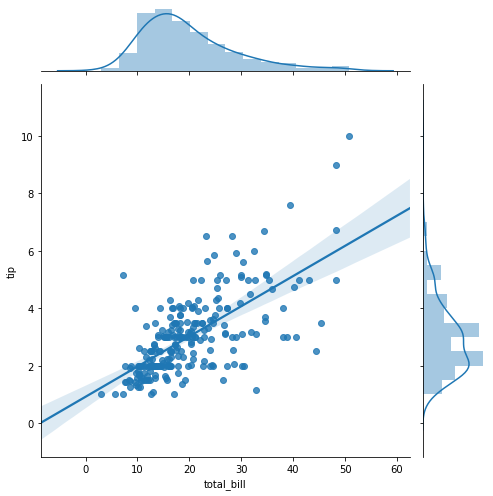

In [8]:
# Compare distribution of total bill and tips
# Code adapted from https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions 
# and https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
plot = sns.jointplot(x="total_bill", y="tip", kind="reg", height=7, data=tips)

The plot above shows a general trend that the tip received is directly proportional to the amount of the total bill.

#### <font color='blue'>Distribution of tip and total_bill percentage</font>
Every bill in this dataset has a tip associated with it. There is a high probability that this dataset originates in the USA, as tipping in the USA at restaurants is expected and is considered part of the serving staffs wages in many US states. In other countries tipping is less common.  The generally accepted minimum tip in USA is recommended to be 15% of the total bill. Better service is often rewarded with higher tip rates.
(references https://eu.usatoday.com/story/money/2015/06/14/much-tip-depends/71137254/ and https://www.tripadvisor.com/Travel-g191-s606/United-States:Tipping.And.Etiquette.html).

The following code reviews the tip percentage compared to the total_bill to explore if this 15% or higher tip rate is apparent in the tips dataset.

Tip percentage summary: Max 71%, Min 3%, mean 16% and median 15%.


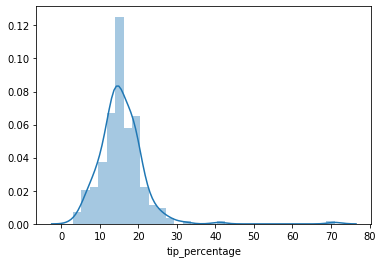

In [9]:
# Add new column to dataframe and calculate tip percentages
# Code adapted from https://stackoverflow.com/a/46570641
# define a function for the new column
fn = lambda row: int(100 * row.tip / row.total_bill) 
# get column data with an index
col = tips.apply(fn, axis=1)
# assign values to column 'tip_percentage'
tips = tips.assign(tip_percentage=col.values) 

# Display the min, max, mean and median tip %
print("Tip percentage summary: Max {0:.0f}%, Min {1:.0f}%, mean {2:.0f}% and median {3:.0f}%.".format(
       tips.tip_percentage.max(), tips.tip_percentage.min(), tips.tip_percentage.mean(), tips.tip_percentage.median()))

# Plot distribution of tip percentages
# Code adapted from http://seaborn.pydata.org/generated/seaborn.distplot.html
plot = sns.distplot(tips.tip_percentage)

The above statistics and distribution plot of the tip percentage show that is mean tip is 16% and median tip percentage is indeed 15%. The majority of the tips lie within the 5% to 25% range with a few outliers high and low tip percentage rates.

#### <font color='blue'>Review of combined payment</font>
A general look at the various amounts for total_bill and tip show that the sum of the two values appear to regularly add up to a whole number. The following code looks at how often the sum of the two values added to a whole number.

In [10]:
# Add new column to dataframe and calculate sum of total_bill and tip
# define a function for the new column
fn = lambda row: row.tip + row.total_bill
# get column data with an index
col = tips.apply(fn, axis=1)
# assign values to column 'sum_payment'
tips = tips.assign(sum_payment=col.values) 

# count whole sum values for sum_payment
# temp counter
counter = 0
# Iterate through the index rows in the dataframe tips
# Code adapted from https://stackoverflow.com/a/16476974
for index, row in tips.iterrows():
    # check if the sum_payment is a whole number
    if (row['sum_payment'] % 1.0 == 0.0):
        # If sum == whole number add 1 to the counter
        counter += 1
# print the % of whole number sum_payments        
print("The percentage of sum payment resulting in a whole number is {0:.0f}%.".format(
       100 * counter / tips.tip_percentage.count()))

The percentage of sum payment resulting in a whole number is 25%.


The above calculation shows that only about a quarter of the sum of total_bill and tip are rounded up to a whole number by the patron paying the bill. As such this is not a common occurrence. The 15% tip rate appears to be a much better guideline for the amount of tip received.

### <font color='blue'>Analyse of the Dataset</font>

#### <font color='blue'>Distribution of data for smokers</font>
The following plots give the distribution of data points splitting smokers from non-smokers.

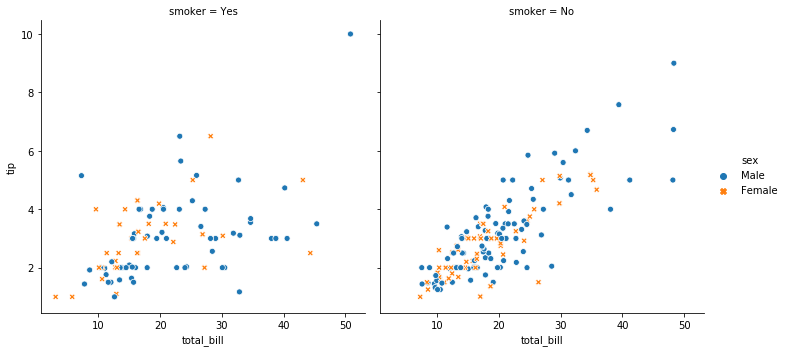

In [11]:
# Display relative plot of bill payed by either sex and if they were a smoker
# Code adapted from https://seaborn.pydata.org/introduction.html and
# https://seaborn.pydata.org/generated/seaborn.relplot.html
plot = sns.relplot(x="total_bill", y="tip", col="smoker",
            style="sex", hue="sex", data=tips);

It is clear from the above plots for non-smokers, comparison of data points for tips received are more clustered proportional to the cost of the total bill. The similar data points comparison appears more scattered for smokers. This variability in tipping amount for smokers may infer that some smokers may choose to spend on smoking rather than tipping. Both of these observations appears to be similar for both male and female patrons paying the bill.


Tip summary from smokers adjusted for party_size:
Max 3.33, Min 0.40, mean 1.30 and median 1.17.



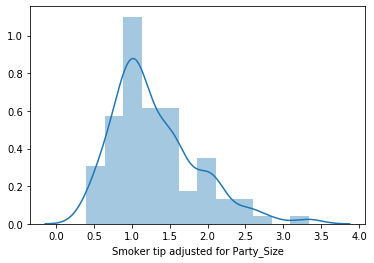

In [12]:
# Temp variable for smoker tip values
smoker_tip_party_size=(tips.tip.loc[tips.loc[:,'smoker'] == "Yes"]/
                       tips.party_size.loc[tips.loc[:,'smoker'] == "Yes"])
# Display the min, max and mean tip from smokers adjusted for party_size
print("""
Tip summary from smokers adjusted for party_size:
Max {0:.2f}, Min {1:.2f}, mean {2:.2f} and median {3:.2f}.
""".format(smoker_tip_party_size.max(),smoker_tip_party_size.min(),
           smoker_tip_party_size.mean(),smoker_tip_party_size.median()))

# Plot distribution of tips from smokers adjusted for party_size
# Code adapted from https://seaborn.pydata.org/generated/seaborn.distplot.html
plot = sns.distplot(smoker_tip_party_size,
                    axlabel="Smoker tip adjusted for Party_Size")


Tip summary from non-smokers adjusted for party_size:
Max 2.92, Min 0.45, mean 1.16 and median 1.05.



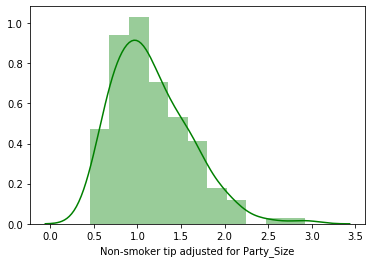

In [13]:
# Temp variable for non-smoker tip values
non_smoker_tip_party_size=(tips.tip.loc[tips.loc[:,'smoker'] == "No"]/
                           tips.party_size.loc[tips.loc[:,'smoker'] == "No"])
# Display the min, max, mean and median tip from non_smokers adjusted for party_size
print("""
Tip summary from non-smokers adjusted for party_size:
Max {0:.2f}, Min {1:.2f}, mean {2:.2f} and median {3:.2f}.
""".format(non_smoker_tip_party_size.max(), non_smoker_tip_party_size.min(),
           non_smoker_tip_party_size.mean(), non_smoker_tip_party_size.median()))

# Plot distribution of tips from non-smokers adjusted for party_size
plot = sns.distplot(non_smoker_tip_party_size, color='g',
                    axlabel="Non-smoker tip adjusted for Party_Size")

However, when the amount of tip received is adjusted for the party_size, the above distribution plots and statistics appear to show that on average smokers tend to give a higher average tip per person than non-smokers.

#### <font color='blue'>Review of Party Size effect</font>
In order to the cost total_bill and tip received effectively, these values should be adjusted to take account of party_size. The following plot show the relative distribution of total_bill and tip per person.

total_bill per person value summary: Max 20.27, Min 2.88, Mean 7.89 and Median 7.25
tip value per person summary:        Max 3.33, Min 0.40, Mean 1.21 and Median 1.11


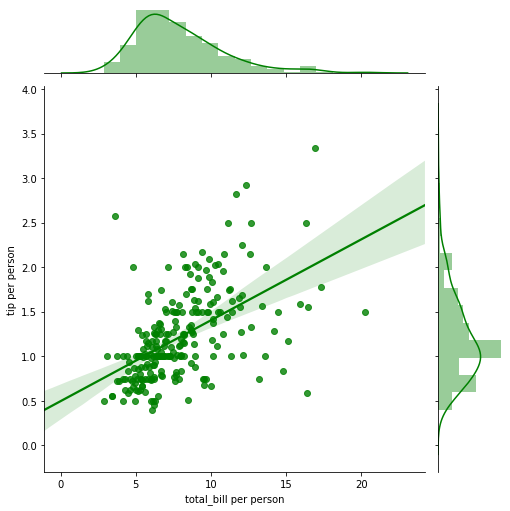

In [14]:
# Display the min, max, mean and median total_bill per person
print("total_bill per person value summary: Max {0:.2f}, Min {1:.2f}, Mean {2:.2f} and Median {3:.2f}".format(
       (tips.total_bill/tips.party_size).max(), (tips.total_bill/tips.party_size).min(),
       (tips.total_bill/tips.party_size).mean(), (tips.total_bill/tips.party_size).median()))

# Display the min, max, mean and median tip per person
print("tip value per person summary:        Max {0:.2f}, Min {1:.2f}, Mean {2:.2f} and Median {3:.2f}".format(
       (tips.tip/tips.party_size).max(), (tips.tip/tips.party_size).min(),
       (tips.tip/tips.party_size).mean(), (tips.tip/tips.party_size).median()))

# Display plot of total_bill versus tip per person
# Code adapted from https://seaborn.pydata.org/generated/seaborn.jointplot.html
plot = sns.jointplot(x=tips.total_bill/tips.party_size,
                     y=tips.tip/tips.party_size,
                     kind="reg", height=7, color="g").set_axis_labels(
                                "total_bill per person", "tip per person")

A noticeable pattern that can be observed from the above plot is the frequency of tips per person with values of approximately **0.75, 1.00 and 1.50 dollars** as can be seen be the clustered lines of point data along these tip value. As indicated by histogram bar on the vertical axis, the most frequent tip appears to be approximately **1.00 dollar per person**. This may be a simpler method for patrons to determine how much to tip rather than having the calculate 15% of the bill.

#### <font color='blue'>Relative daily plots</font>
The distribution of meal times are indicated in the following plots.

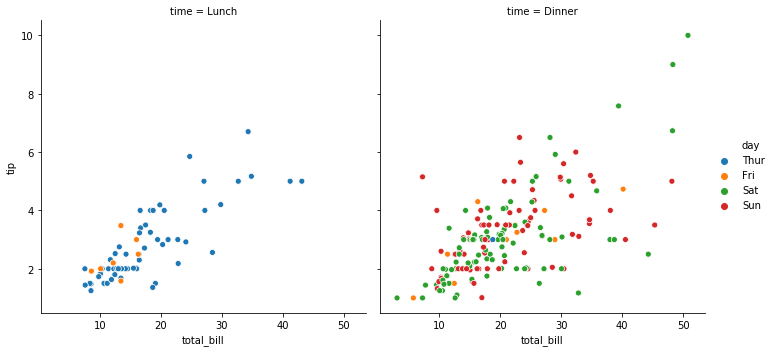

In [15]:
# Display relative plot of mealtime compared to days of the week
plot = sns.relplot(x="total_bill", y="tip", col="time",
                   hue="day", data=tips);

The plots above highlight a distinctive trend in the data. Colour coding of the daily meals indicates that the majority of the lunch time meals occur on Thursday with a lower number on Friday both of which are during the a typical persons working week. Dinner time meals at this restaurant appear to occur more frequently approaching or over the weekend Friday to Sunday, which is to be expected as people generally tend to relax and eat out more in the evenings at the weekend.

### <font color='blue'>Conclusion</font>
My analysis of the observations recorded at this restaurant have highlighted the following points
- The majority of the meals eaten were at Dinner over the weekend
- The majority of the table bill payers were non-smoking males (39.8%)
- A good guide for tip rate is 15% of total_bill or 1 dollar or more per person
- Smokers on average tend to spend more and tip slightly better than non-smokers